In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from datapackage import Package
import scipy.stats as st
from scipy.stats import linregress #---added
from sklearn import datasets
import numpy as np
import seaborn as sns
import json
plt.style.use('seaborn')
import warnings #----added
warnings.filterwarnings('ignore')

In [3]:
global_suicide_data = "master.csv"
global_suicide_data = pd.read_csv(global_suicide_data)

In [4]:
global_suicide_data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
global_suicide_data.info()
#global_suicide_data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
global_suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
#clean columns
global_suicide_data=global_suicide_data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age'
                     ,'suicides_no':'SuicidesNo','population':'Population',
                      'suicides/100k pop':'Suicides/100kPop','country-year':'Country/Year',
                      'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYear($)',
                      'gdp_per_capita ($)':'GdpPerCapital($)','generation':'Generation'})

In [8]:
#checking for null values
global_suicide_data.isnull().any()

Country             False
Year                False
Gender              False
Age                 False
SuicidesNo          False
Population          False
Suicides/100kPop    False
Country/Year        False
HDIForYear           True
GdpForYear($)       False
GdpPerCapital($)    False
Generation          False
dtype: bool

In [9]:
#count amount of null values
global_suicide_data.isnull().sum()

Country                 0
Year                    0
Gender                  0
Age                     0
SuicidesNo              0
Population              0
Suicides/100kPop        0
Country/Year            0
HDIForYear          19456
GdpForYear($)           0
GdpPerCapital($)        0
Generation              0
dtype: int64

In [10]:
global_suicide_data.drop('HDIForYear', axis=1, inplace = True)

In [11]:
global_suicide_data #------- added this cell

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,Country/Year,GdpForYear($),GdpPerCapital($),Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z


In [12]:
global_suicide_data.drop('Country/Year', axis=1, inplace=True)

In [13]:
#--------------Keeping 1990-2015 based on value counts global_suicide_data2
global_suicide_data2 = global_suicide_data.loc[(global_suicide_data.Year >= 1990) & (global_suicide_data.Year < 2016)]
global_suicide_data = global_suicide_data[global_suicide_data.Year >= 2000]

In [14]:
global_suicide_data["Year"].value_counts()

2009    1068
2001    1056
2010    1056
2011    1032
2007    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2004    1008
2005    1008
2012     972
2013     960
2014     936
2015     744
2016     160
Name: Year, dtype: int64

In [15]:
print(global_suicide_data2['Year'].unique()) #----1990-2015

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 1990 1991 2012 2013 2014 2015 2011]


In [16]:
#here we have dropped unneeded columns, as well as filtered the data
global_suicide_data.shape

(16168, 10)

In [17]:
#create new data frame grouped by year to check
yearlyStats = global_suicide_data.groupby('Year').sum()
yearlyStats

,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Year,,,,
2000,255832,1799227908,14387.45,12865476
2001,250652,1755565489,14276.21,12677892
2002,256095,1822152815,14227.72,13017420
2003,256079,1838458020,13627.58,15187104
2004,240861,1745246613,12581.80,17895936
2005,234375,1734909645,12164.99,20317212
2006,233361,1840908837,12166.01,21563784
2007,233408,1859564353,12410.15,24709620
2008,235447,1860620851,12145.84,26936208


In [18]:
#Checking countries for bad values
countryStats = global_suicide_data.groupby('Country').sum()
countryStats.to_csv('CountryNumbers.csv')
countryStats

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Country,,,,,
Albania,264660,956,30706067,446.38,388020
Antigua and Barbuda,337188,9,1164590,146.90,2200824
Argentina,385440,48927,585500629,1955.73,1780188
Armenia,357492,1004,43460973,557.41,499376
Aruba,288792,84,1104162,1172.54,3601524
...,...,...,...,...,...
United Arab Emirates,144540,622,36502275,94.89,3035664
United Kingdom,385440,68815,925960697,1299.77,8146224
United States,385440,575514,4508454430,2485.52,9537960


In [19]:
global_suicide_data['Country'].unique() #---- added cell to double check names of countries below

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea',
       'Romania', 'Russian Federation', 

In [20]:
#dropping countries with bad data -- ?????

countryStats = global_suicide_data[global_suicide_data['SuicidesNo'] > 40] 
countryStats.to_csv('CleanCountryStats')

countryStats

global_suicide_data = countryStats
global_suicide_data

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation
768,Argentina,2000,male,75+ years,232,525161,44.18,"284,203,750,000",8462,G.I. Generation
769,Argentina,2000,male,55-74 years,602,2333377,25.80,"284,203,750,000",8462,Silent
770,Argentina,2000,male,35-54 years,578,4096814,14.11,"284,203,750,000",8462,Boomers
771,Argentina,2000,male,15-24 years,463,3306109,14.00,"284,203,750,000",8462,Generation X
772,Argentina,2000,male,25-34 years,331,2602314,12.72,"284,203,750,000",8462,Generation X
...,...,...,...,...,...,...,...,...,...,...
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,"63,067,077,179",2309,Millenials
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z


In [21]:
#removing 2016 due to being incomplete
global_suicide_data = global_suicide_data[global_suicide_data.Year != 2016]

In [22]:
global_suicide_data.shape

(6762, 10)

In [23]:
global_suicide_data.sample(10)

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation
3761,Belgium,2011,female,15-24 years,41,656675,6.24,"527,008,453,887",50893,Millenials
1758,Australia,2013,female,25-34 years,95,1676648,5.67,"1,573,696,522,007",72856,Millenials
3382,Belarus,2009,male,55-74 years,466,726459,64.15,"49,209,523,810",5366,Silent
13116,Italy,2012,male,15-24 years,179,3031610,5.90,"2,072,823,157,060",36497,Millenials
9299,France,2002,female,15-24 years,120,3826195,3.14,"1,494,286,655,374",26714,Millenials
16745,Mexico,2000,male,25-34 years,797,8473261,9.41,"707,906,744,575",7892,Generation X
13677,Japan,2011,male,35-54 years,6975,17224000,40.50,"6,157,459,594,824",50919,Generation X
19245,Poland,2006,female,15-24 years,78,3003407,2.60,"344,748,646,558",9485,Millenials
17379,Netherlands,2011,male,75+ years,91,455083,20.00,"893,757,287,202",56667,Silent
19627,Portugal,2010,female,35-54 years,72,1588670,4.53,"238,303,443,425",23673,Generation X


In [24]:
global_suicide_data.Country.unique()

array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala',
       'Guyana', 'Hungary', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Mauritius',
       'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Suriname',
       'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago',
       'Turkey', 'Turkmenistan', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay',

In [25]:
#create lists of countries per continent
europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'] 
asia = ['Armenia', 'Bahrain', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']
northamerica = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
southamerica =  ['Argentina', 'Aruba', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Uruguay']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'] 
australiaoceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']

In [26]:
#move these to a dictionary of continents
continents = {country: 'Asia' for country in asia}
continents.update({country: 'Europe' for country in europe})
continents.update({country: 'Africa' for country in africa})
continents.update({country: 'North_America' for country in northamerica})
continents.update({country: 'South_America' for country in southamerica})
continents.update({country: 'Australia_Oceania' for country in australiaoceania})

In [27]:
global_suicide_data.Country.unique()

array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala',
       'Guyana', 'Hungary', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Mauritius',
       'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Suriname',
       'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago',
       'Turkey', 'Turkmenistan', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay',

In [28]:
#map continents to countries
global_suicide_data['Continent'] = global_suicide_data['Country'].map(continents)
global_suicide_data2['Continent'] = global_suicide_data2['Country'].map(continents)

In [29]:
global_suicide_data.shape

(6762, 11)

In [30]:
data_per_year = global_suicide_data.groupby('Year').sum()
data_per_year['SuicidesNo']

Year
2000    250745
2001    245307
2002    251006
2003    251083
2004    236110
2005    229397
2006    228695
2007    228076
2008    230045
2009    238106
2010    233074
2011    231447
2012    225291
2013    218228
2014    218156
2015    199738
Name: SuicidesNo, dtype: int64

In [31]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.close()

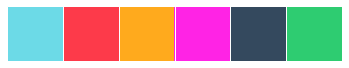

In [32]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

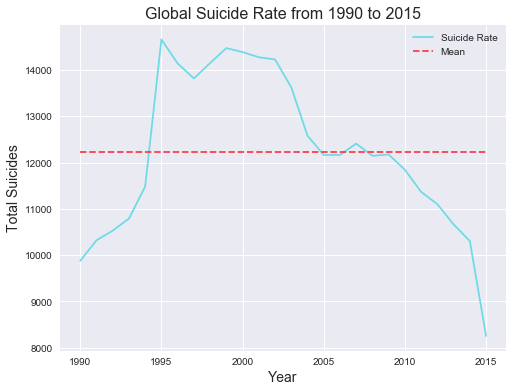

In [33]:
#----adding to observe overall trends from 1990-2015
curr2 = global_suicide_data2.dropna().groupby(['Year']).sum().reset_index()
curr2['per_100k'] = curr2['Suicides/100kPop']
plt.figure(figsize = (8,6))
plt.plot(curr2['Year'], curr2['per_100k'], label = "Suicide Rate")
plt.plot(curr2['Year'], [curr2['per_100k'].mean()] * len(curr2), '--', label = "Mean")
plt.title("Global Suicide Rate from 1990 to 2015", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Total Suicides", fontsize = 14)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

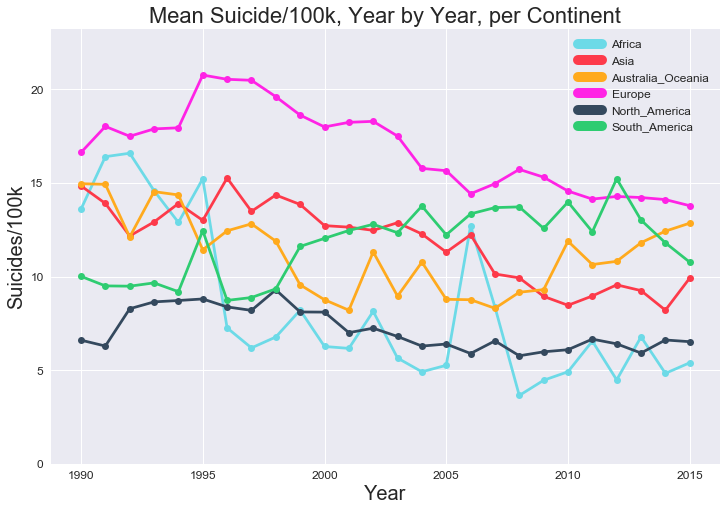

In [34]:
#----adding to observe overall trends from 1990-2015

curr3 = global_suicide_data2.groupby(['Continent','Year'],sort=True,as_index=False)['Suicides/100kPop'].mean()
by_cont = curr3.groupby('Continent')
 
for name, group in by_cont:
    plt.plot(group['Year'], group['Suicides/100kPop'], label=name, marker ='o', linewidth=2.75)

plt.title('Mean Suicide/100k, Year by Year, per Continent', fontsize = 22)
plt.ylabel('Suicides/100k', fontsize = 20)
plt.yticks(fontsize = 12) #----added
plt.ylim(0, max(group['Suicides/100kPop'])+8) #----added
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 12) #----added
leg = plt.legend(fontsize = 12)
for line in leg.get_lines():
    line.set_linewidth(10)
plt.show

In [35]:
global_suicide_data

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapital($),Generation,Continent
768,Argentina,2000,male,75+ years,232,525161,44.18,"284,203,750,000",8462,G.I. Generation,South_America
769,Argentina,2000,male,55-74 years,602,2333377,25.80,"284,203,750,000",8462,Silent,South_America
770,Argentina,2000,male,35-54 years,578,4096814,14.11,"284,203,750,000",8462,Boomers,South_America
771,Argentina,2000,male,15-24 years,463,3306109,14.00,"284,203,750,000",8462,Generation X,South_America
772,Argentina,2000,male,25-34 years,331,2602314,12.72,"284,203,750,000",8462,Generation X,South_America
...,...,...,...,...,...,...,...,...,...,...,...
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,"63,067,077,179",2309,Millenials,Asia
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,"63,067,077,179",2309,Millenials,Asia
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,Asia
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,Asia


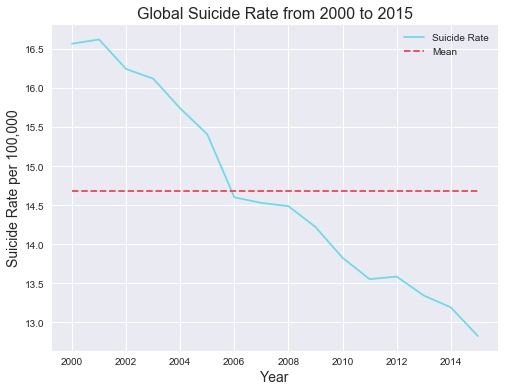

In [36]:
curr = global_suicide_data.dropna().groupby(['Year']).sum().reset_index()
curr['per_100k'] = curr['SuicidesNo'] * 100000 / curr['Population'] #--- isn't there a column for this in the dataframe?
plt.figure(figsize = (8,6))
plt.plot(curr['Year'], curr['per_100k'], label = "Suicide Rate")
plt.plot(curr['Year'], [curr['per_100k'].mean()] * len(curr), '--', label = "Mean")
plt.title("Global Suicide Rate from 2000 to 2015", fontsize = 16) #-----adjusted year
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Suicide Rate per 100,000", fontsize = 14)
plt.legend()
plt.savefig('Graphs/GlobalSuicideRate.png') #----saving image
plt.show()

In [37]:
#group data by continent
data_per_continent = global_suicide_data.groupby('Continent').mean()
data_per_continent

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Continent,,,,,
Africa,2007.981818,87.618182,4.505985e+06,3.144727,6252.763636
Asia,2007.326184,767.432529,4.225463e+06,21.333056,15765.506702
Australia_Oceania,2007.531100,198.449761,1.341381e+06,16.721388,42071.287081
Europe,2007.348293,492.774229,2.525400e+06,24.365176,27700.709802
North_America,2007.420273,846.933941,7.696702e+06,13.668018,22059.220957
South_America,2007.538550,317.707710,4.815606e+06,14.705938,7871.631761


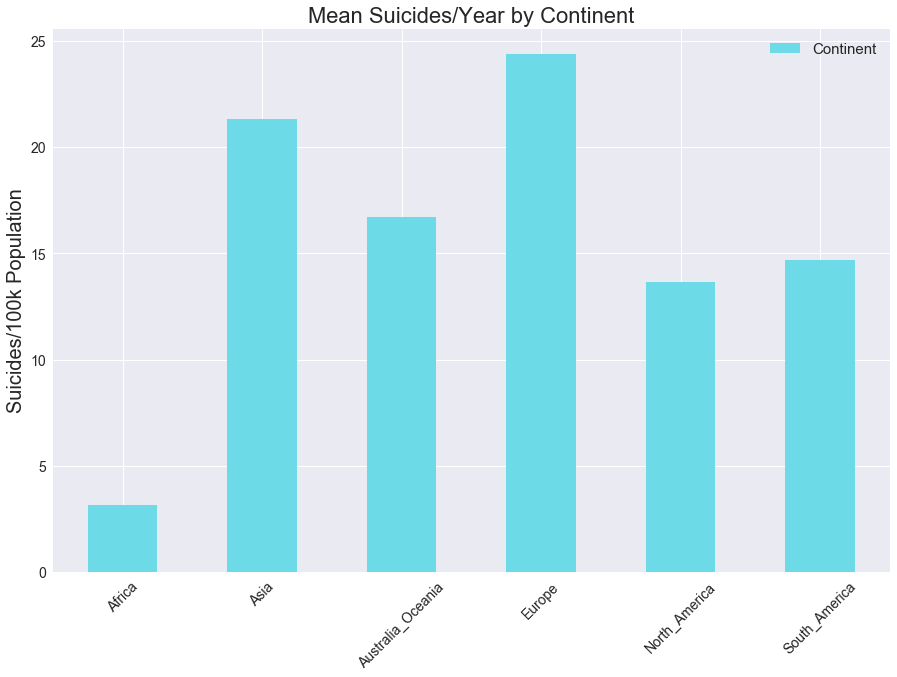

In [38]:
#plot mean suicides/year by continent
ax = data_per_continent['Suicides/100kPop'].plot(kind='bar', figsize=(15, 10), fontsize=14)
plt.title('Mean Suicides/Year by Continent', fontsize = 22)
#ax.set_xlabel("Continent", fontsize=20) #---- do we need this?? legend instead???
ax.set_xlabel('') #---- added this
plt.xticks(rotation=45) #---- added this
ax.set_ylabel("Suicides/100k Population", fontsize=20)
plt.legend(['Continent'], prop={'size':15})
plt.savefig('Graphs/BarGraphGlobalSuicideRate.png') #----saving image
plt.show()

In [39]:
dftesting = global_suicide_data[['Continent','Year','Suicides/100kPop']]
dftesting

,Continent,Year,Suicides/100kPop
768,South_America,2000,44.18
769,South_America,2000,25.80
770,South_America,2000,14.11
771,South_America,2000,14.00
772,South_America,2000,12.72
...,...,...,...
27812,Asia,2014,11.10
27814,Asia,2014,5.92
27815,Asia,2014,2.96
27817,Asia,2014,2.17


In [40]:
dfAgg = dftesting.groupby(['Continent','Year'],sort=True,as_index=False)['Suicides/100kPop'].mean()

<function matplotlib.pyplot.show(*args, **kw)>

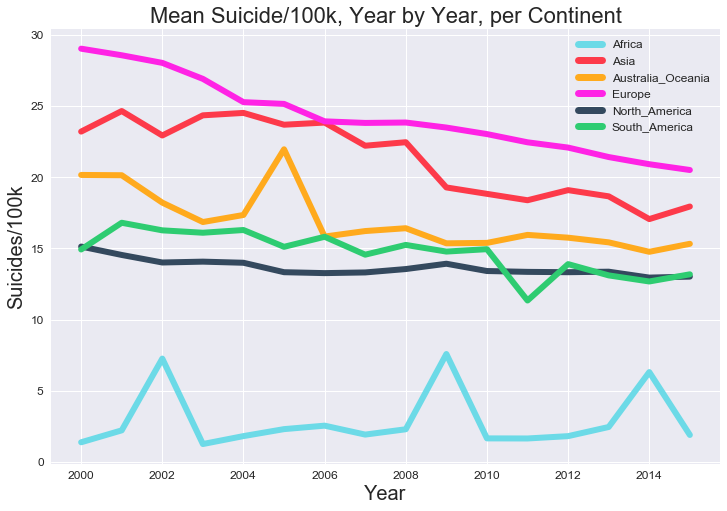

In [41]:
#plotting mean suicide/100k by continent, year by year
by_cont = dfAgg.groupby('Continent')

for name, group in by_cont:
    plt.plot(group['Year'], group['Suicides/100kPop'], label=name, linewidth=6.0)
    

plt.title('Mean Suicide/100k, Year by Year, per Continent', fontsize = 22)
plt.ylabel('Suicides/100k', fontsize = 20)
plt.yticks(fontsize = 12) #----added
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 12) #----added
leg = plt.legend(fontsize = 12)
for line in leg.get_lines():
    line.set_linewidth(7)
plt.savefig('Graphs/LineGraphContinentSuicideRate.png') #----saving image
plt.show

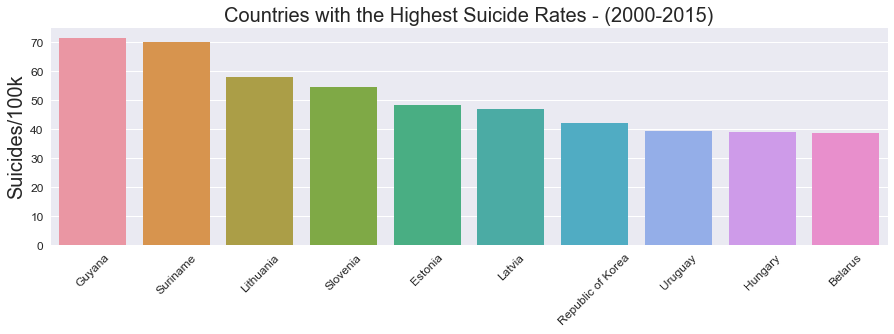

In [42]:
#plotting countries with the highest suicide rate
data_suicide_mean = global_suicide_data['Suicides/100kPop'].groupby(global_suicide_data.Country).mean().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(data_suicide_mean.head(10).index,data_suicide_mean.head(10))
plt.ylabel('Suicides/100k', fontsize = 20)
#plt.xlabel('Country', fontsize = 20) -- remove?
plt.xlabel('')
plt.title('Countries with the Highest Suicide Rates - (2000-2015)', fontsize = 20) #----added this
plt.xticks(fontsize = 12,rotation=45) #----added this; do we want to increase font size
plt.yticks(fontsize = 12) #----added this
plt.savefig('Graphs/BarGraphCountHighSuicideRate.png') #----saving image
plt.show()

In [43]:
#creating sub frame for USA only 
dfUSA = global_suicide_data[global_suicide_data.Country == 'United States']
usa_by_year = dfUSA.groupby('Year').sum()

In [44]:
dfUSA.corr(method ='pearson')

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapital($)
Year,1.000000,0.120717,0.092452,0.062626,0.982037
SuicidesNo,0.120717,1.000000,0.605890,0.674699,0.116494
Population,0.092452,0.605890,1.000000,-0.035493,0.090906
Suicides/100kPop,0.062626,0.674699,-0.035493,1.000000,0.058545
GdpPerCapital($),0.982037,0.116494,0.090906,0.058545,1.000000


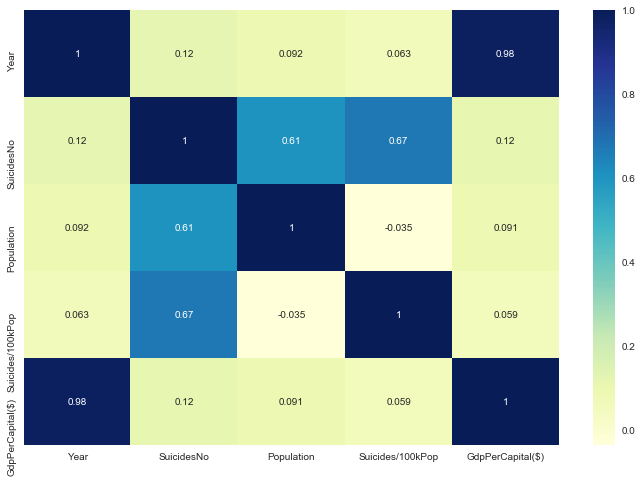

In [45]:
sns.heatmap(dfUSA.corr(method = 'pearson'),cmap='YlGnBu', annot=True)

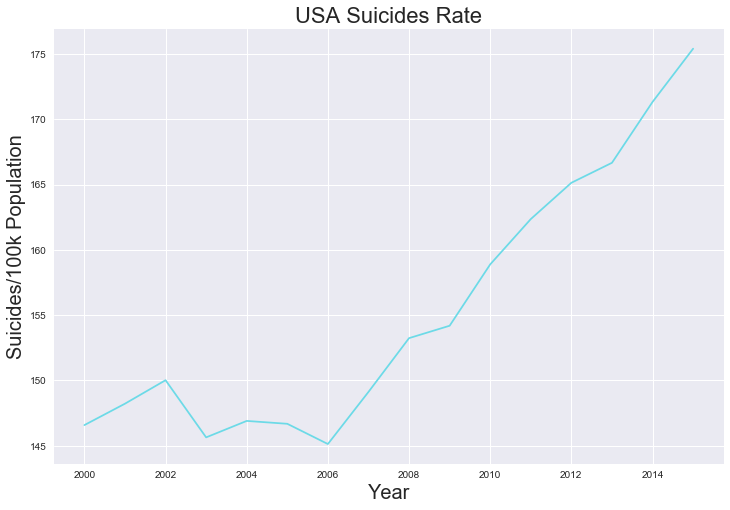

In [46]:
usa_by_year['Suicides/100kPop'].plot()
plt.title('USA Suicides Rate', fontsize = 22)
plt.ylabel('Suicides/100k Population', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.savefig('Graphs/USAratesLineGraph.png') #----saving image
plt.show()

In [47]:
#new data frame with only data from 2015
df2015 = global_suicide_data[global_suicide_data.Year == 2015]

In [48]:
df2015 = df2015[['Country','Suicides/100kPop','GdpPerCapital($)', 'Continent']]

In [49]:
df2015

,Country,Suicides/100kPop,GdpPerCapital($),Continent
948,Argentina,34.38,14981,South_America
949,Argentina,18.74,14981,South_America
950,Argentina,14.31,14981,South_America
951,Argentina,14.13,14981,South_America
952,Argentina,12.25,14981,South_America
...,...,...,...,...
27544,Uruguay,73.42,16696,South_America
27545,Uruguay,47.86,16696,South_America
27546,Uruguay,40.75,16696,South_America
27547,Uruguay,31.84,16696,South_America


In [50]:
df2015check = df2015.groupby('Country').sum()

In [51]:
df2015check['GdpPerCapital($)'] = df2015check['GdpPerCapital($)'].div(2)

In [52]:
df2015check.reset_index(level=0, inplace=True)
df2015check

,Country,Suicides/100kPop,GdpPerCapital($)
0,Argentina,108.52,67414.5
1,Australia,153.22,303280.0
2,Austria,186.62,185936.0
3,Belgium,192.80,192735.0
4,Brazil,77.45,56586.0
5,Chile,141.45,66280.5
6,Colombia,68.04,32760.0
7,Croatia,209.37,43228.5
8,Cuba,188.43,32176.0
9,Czech Republic,163.02,74812.0


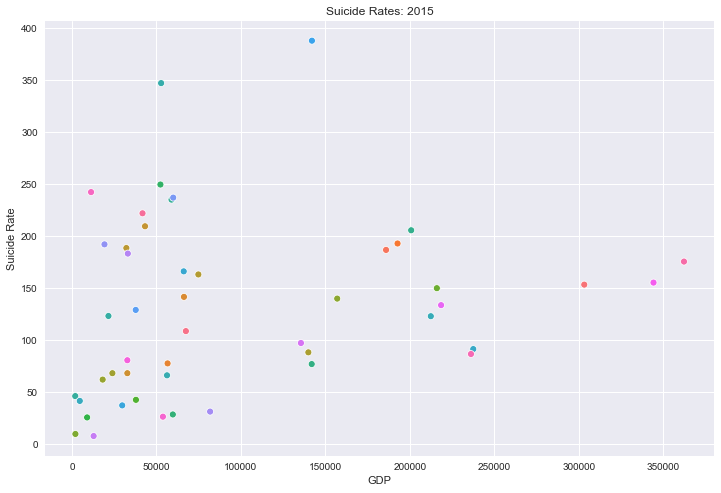

In [53]:
sns.scatterplot(x='GdpPerCapital($)', y='Suicides/100kPop', data=df2015check, hue='Country',legend=False) 
plt.title('Suicide Rates: 2015')
plt.ylabel('Suicide Rate')
plt.xlabel('GDP')
plt.show()
# Checking data for rates --- leave this??

In [54]:
df2015.shape

(354, 4)

In [55]:
dfcont = df2015.groupby(['Continent','Country'],sort=True,as_index=False)['Suicides/100kPop','GdpPerCapital($)'].sum()

In [56]:
dfcont['GdpPerCapital($)'] = dfcont['GdpPerCapital($)'] #.div(2) #--- why are we dividing by 2???
dfcont.reset_index(level=0, inplace=True)

In [57]:
dfcont

,index,Continent,Country,Suicides/100kPop,GdpPerCapital($)
0,0,Africa,South Africa,7.60,25612
1,1,Asia,Israel,28.34,119379
2,2,Asia,Japan,205.51,401610
3,3,Asia,Kazakhstan,235.00,117840
4,4,Asia,Kyrgyzstan,46.01,3855
5,5,Asia,Republic of Korea,387.87,284100
6,6,Asia,Singapore,31.10,163532
7,7,Asia,Thailand,80.50,65520
8,8,Asia,Turkey,26.20,107649
9,9,Australia_Oceania,Australia,153.22,606560


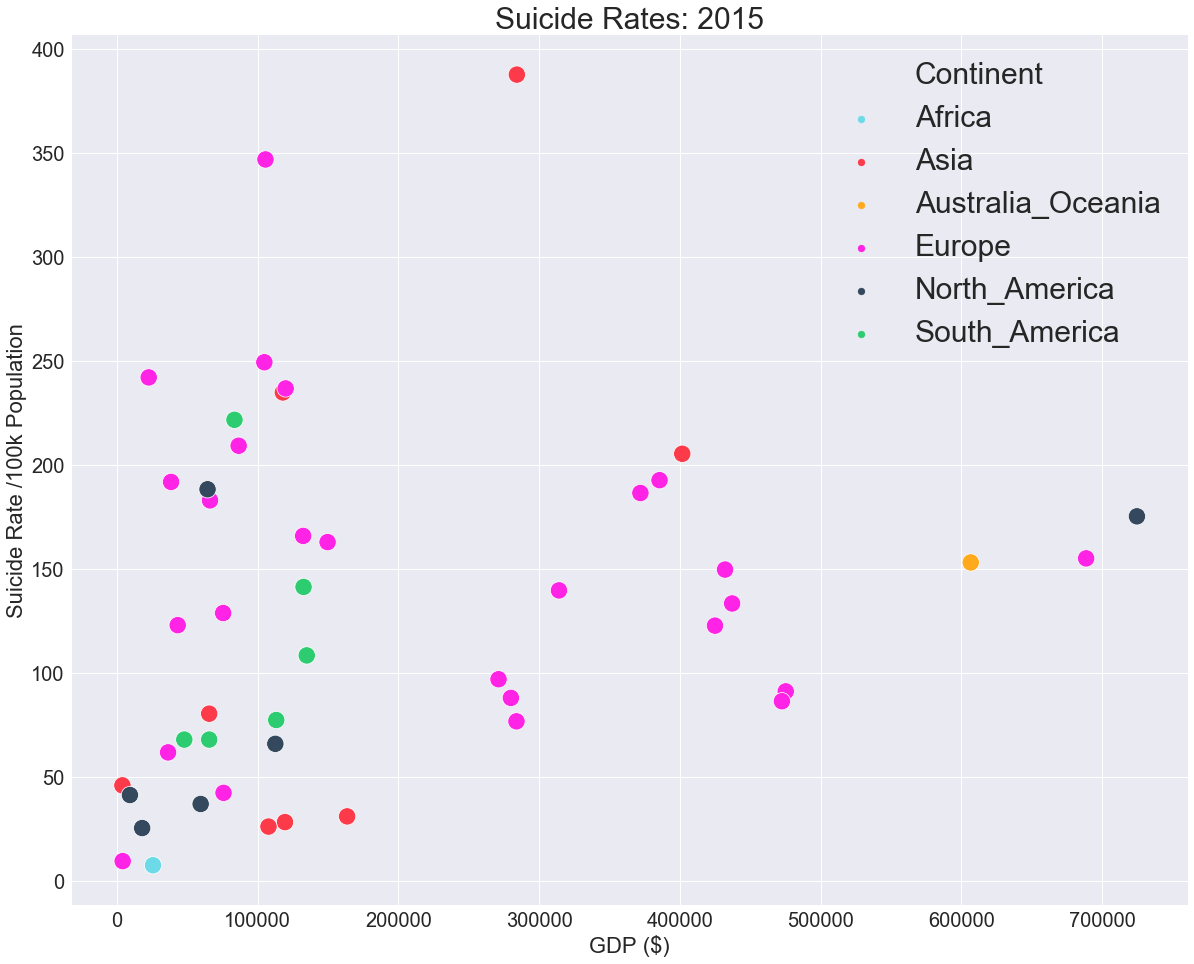

In [58]:
#plot suicide rate vs gdp
plt.figure(figsize=(20,16))
sns.scatterplot(x='GdpPerCapital($)',s=300, y='Suicides/100kPop',data=dfcont, hue='Continent') 
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP ($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=1, prop={'size': 30})
plt.savefig('Graphs/ScatterSuicideRates2015.png') #----saving image

plt.show()

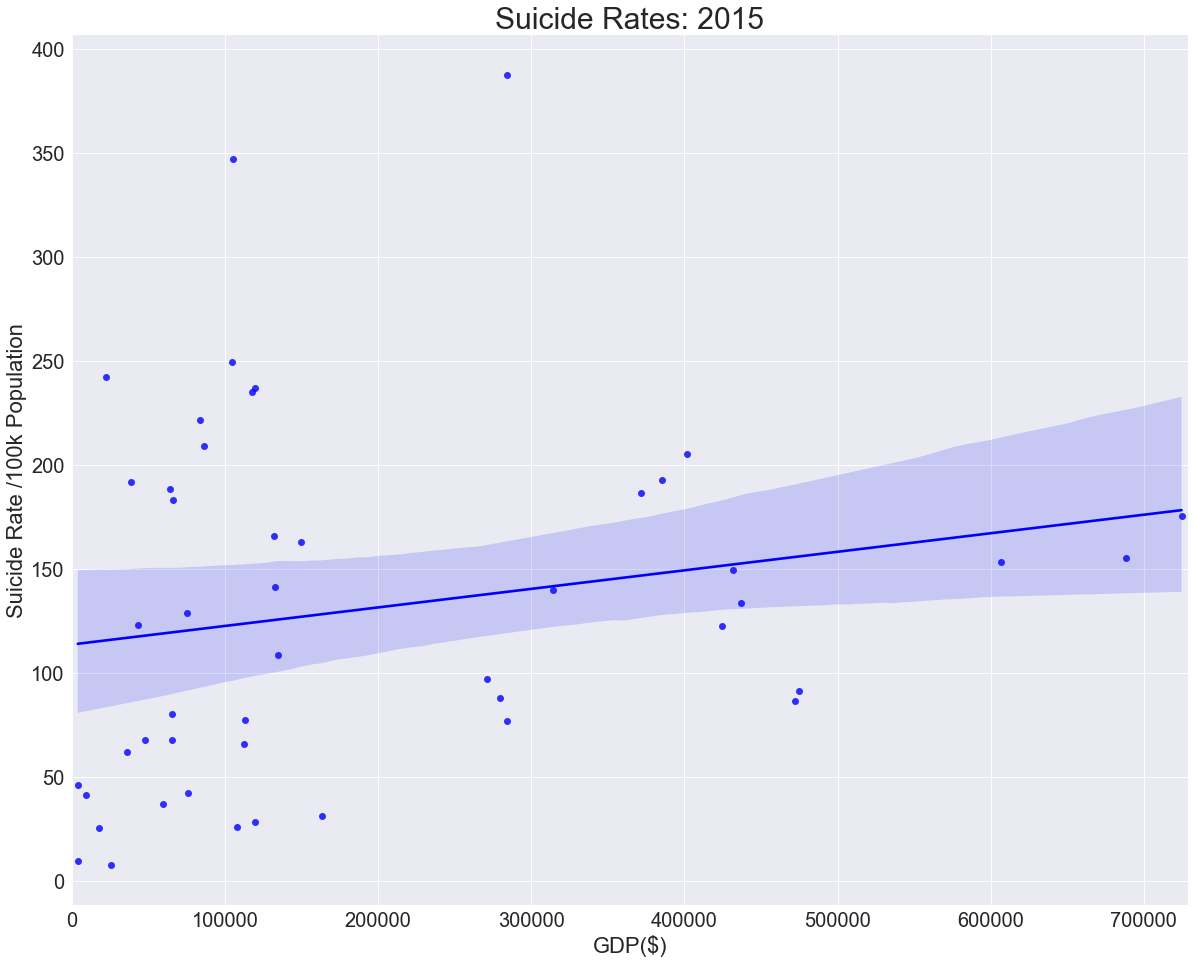

In [59]:
#regression plot for suicide rates vs gdp --- fix

plt.figure(figsize=(20,16))
sns.regplot(x="GdpPerCapital($)", y="Suicides/100kPop", data=dfcont, color = 'b')
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.xlim(min(dfcont["GdpPerCapital($)"]) - 4000, max(dfcont["GdpPerCapital($)"])+4000)
plt.yticks(fontsize=20)
#plt.savefig('Graphs/LinRegSuicideRates2015.png')
plt.show()

#print(f'The correlation coefficient, r, is: {rvalue}') #Printing the r value
#print(f'And r-squared is: {rvalue**2}') #Printing the r squared value


(array([17., 13.,  2.,  4.,  1.,  5.,  3.,  0.,  1.,  2.]),
 array([  3855. ,  75933.9, 148012.8, 220091.7, 292170.6, 364249.5,
        436328.4, 508407.3, 580486.2, 652565.1, 724644. ]),
 <a list of 10 Patch objects>)

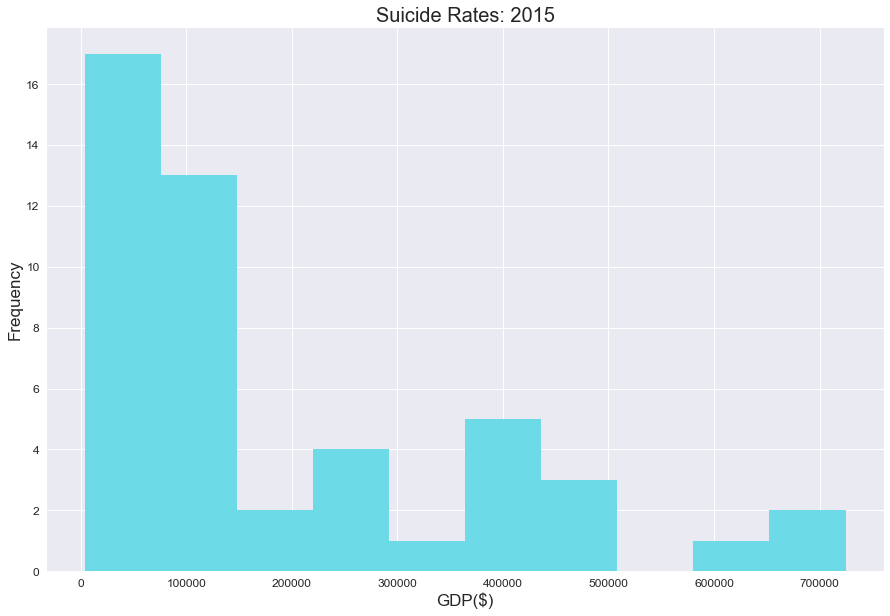

In [60]:
#regression plot for suicide rates vs gdp
x=dfcont["GdpPerCapital($)"]
plt.figure(figsize=(15,10))
plt.xlabel('GDP($)', fontsize = 17)
plt.ylabel('Frequency', fontsize = 17) #---total number of countries??
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Suicide Rates: 2015', fontsize= 20)
plt.savefig('Graphs/HistogramSuicideRates2015.png')
plt.hist(x)

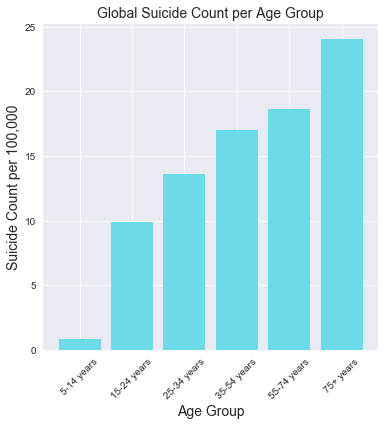

In [61]:
curr = global_suicide_data.groupby(['Age']).sum().reset_index()
xticks = [2, 3, 4, 1, 5, 6]

curr['order'] = xticks
curr = curr.sort_values(['order'], ascending=True).reset_index(drop=True)
curr

plt.figure(figsize=(6,6))
#curr = global_suicide_data.groupby(['Age']).sum().reset_index()
plt.bar(curr['Age'].values, curr['SuicidesNo'].values * 100000 / curr['Population'].values)
plt.title('Global Suicide Count per Age Group', fontsize = 14)
plt.xlabel('Age Group', fontsize = 14)
plt.ylabel('Suicide Count per 100,000', fontsize = 14)
plt.xticks(rotation = 45)
plt.savefig('Graphs/BarGraphAgeSuicideRates.png') #----saving image
plt.show()

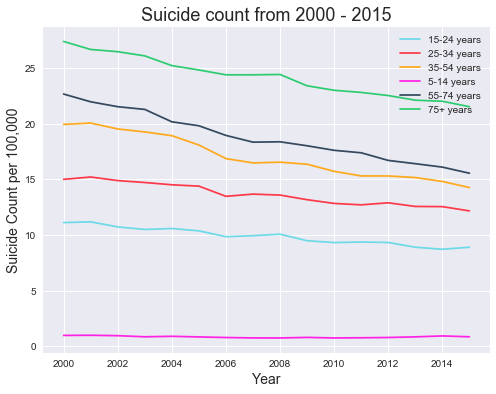

In [62]:
curr = global_suicide_data.groupby(['Year', 'Age']).sum().reset_index()
plt.figure(figsize = (8,6))
for age_group in curr['Age'].unique():
    sub = curr[curr['Age'] == age_group]
    sub['per_100k'] = sub['SuicidesNo'] * 100000 / sub['Population']
    plt.plot(sub['Year'], sub['per_100k'], label = age_group)

plt.title('Suicide count from 2000 - 2015', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicide Count per 100,000', fontsize = 14)
plt.legend()
plt.savefig('Graphs/CountryLineSuicideRates.png') #----saving image
plt.savefig('Graphs/LineAgeSuicideRates.png')
plt.show()
##legenddddd


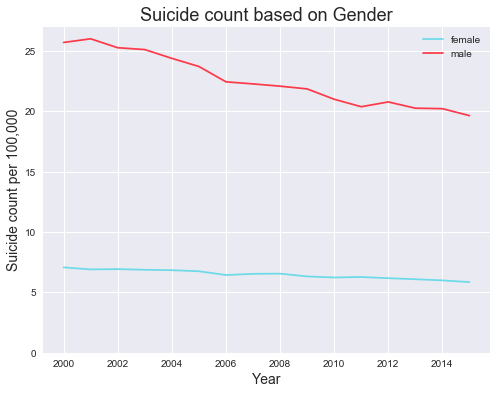

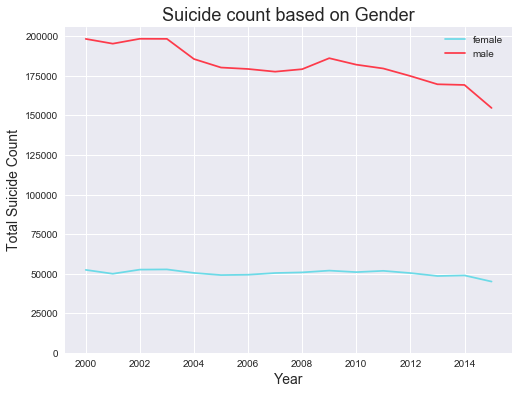

In [63]:
curr = global_suicide_data[(global_suicide_data['SuicidesNo'] != np.NaN) & (global_suicide_data['Population'] != np.NaN)]
curr = global_suicide_data.groupby(['Year', 'Gender']).sum().reset_index()
plt.figure(figsize = (8,6))
for sex in curr['Gender'].unique():
    sub = curr[curr['Gender'] == sex]
    sub['per_100k'] = sub['SuicidesNo'] * 100000 / sub['Population']
    plt.plot(sub['Year'], sub['per_100k'], label = sex)

plt.title('Suicide count based on Gender', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicide count per 100,000', fontsize = 14)
plt.ylim(bottom = 0)
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for sex in curr['Gender'].unique():
    sub = curr[curr['Gender'] == sex]
    plt.plot(sub['Year'], sub['SuicidesNo'], label = sex)

plt.title('Suicide count based on Gender', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total Suicide Count', fontsize = 14)
plt.ylim(bottom = 0)
plt.legend()
plt.savefig('Graphs/LineGenderSuicideRates.png') #----saving image --- pick one graph??
plt.show()

In [64]:

# Generate pie plot showing the distribution of female versus male suicide percent
suicide_gender = global_suicide_data.groupby("Gender")

gender_suicide_percent = 100*suicide_gender['SuicidesNo'].sum()/global_suicide_data['SuicidesNo'].sum()
gender_suicide_percent

Gender
female    21.680849
male      78.319151
Name: SuicidesNo, dtype: float64

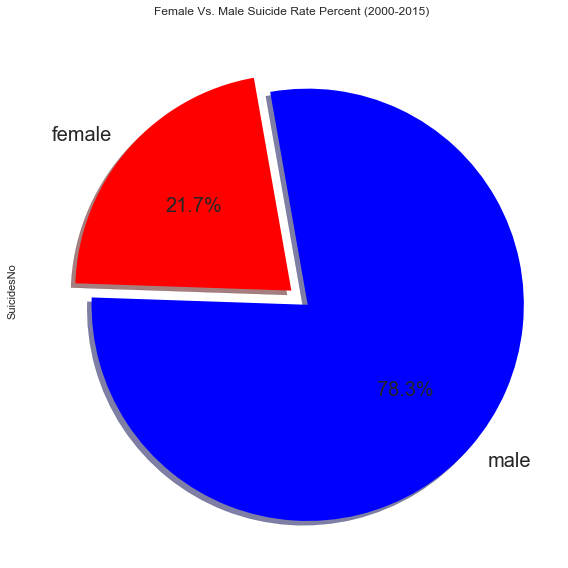

In [65]:

# Pie Plot
suicide_vs_age = gender_suicide_percent.plot(kind='pie', y='Gender', title="Female Vs. Male Suicide Rate Percent (2000-2015)",\
                startangle=100, autopct='%1.1f%%',shadow=True, fontsize=20, colors =["r","b"],legend =False, explode =(0, 0.1))
plt.tight_layout()
plt.savefig('Graphs/PieGenderSuicideRates.png') #----saving image
plt.show()